# README

This notebook is designed to work with a pre‑computed `h5ad` file containing single‑cell
data processed with FastHigashi. Its main purpose is to subset the dataset by organ
(Liver or Brain) and by sample, compute pseudotime quantiles, and visualise the results
on UMAP embeddings.

## What it does

1. **Load data**  
    Read the aggregated `kept_samples_fasthigashi_intergrade_pseudo_co.h5ad` file into an
    `AnnData` object.

2. **Inspect pseudotime**  
    Iterate over a list of samples and organs to print the median (50th percentile)
    pseudotime for each combination.

3. **Subset and plot**  
    - Create separate `AnnData` objects for Liver and Brain cells (excluding sample
      `E14.5F6`).
    - Generate UMAP plots coloured by the pseudotime value, setting custom limits on the
      axes and clipping the colour scale to the 15‑85th (or 10‑90th) percentile range.
    - Generate additional UMAP plots coloured by sample.
    - Save the figures to the specified output directory.

## Requirements

- `scanpy`, `numpy`, `os`, and `matplotlib` (via `scanpy.pl`) must be available.
- The input directory and filenames are hardcoded at the top of the notebook; adjust
  them as necessary.

You can run the cells in order to reproduce the pseudotime summaries and the UMAP
visualisations for the Liver and Brain subsets.

In [47]:
import os
import numpy as np
import scanpy as sc

input_dir = '/home/goubo/CRICK/CRICK/spaceA/higashi_v2/fasthigashi/intergrade_v2/'
out_dir = '/home/xuyuetong/CRICK_Data_v3/Paper_Fig/Pseudotime_Analysis/'
h5ad_path = '{0}kept_samples_fasthigashi_intergrade_pseudo_co.h5ad'.format(input_dir)
adata =sc.read_h5ad(h5ad_path)

In [94]:
sample_list=['E11.5L1','E11.5L2','E12.5L5','E12.5L6','E13.5C1','E13.5C4','E13.5C6','E14.5F5', 'E14.5F6']
organ_list = ['Liver','Brain']

for organ in organ_list:
    for sample in sample_list:
        adata_Liver = adata[(adata.obs['fasthigashi_leiden_anno_man']==organ) & (adata.obs['sample']==sample)]
        pseudotime = adata_Liver.obs['Pseudotime'].values
        q2 = round(np.percentile(pseudotime, 50), 3)
        print(organ, sample, q2)


Liver E11.5L1 0.32
Liver E11.5L2 0.312
Liver E12.5L5 0.319
Liver E12.5L6 0.314
Liver E13.5C1 0.373
Liver E13.5C4 0.359
Liver E13.5C6 0.357
Liver E14.5F5 0.328
Liver E14.5F6 0.394
Brain E11.5L1 0.316
Brain E11.5L2 0.271
Brain E12.5L5 0.543
Brain E12.5L6 0.513
Brain E13.5C1 0.526
Brain E13.5C4 0.533
Brain E13.5C6 0.527
Brain E14.5F5 0.487
Brain E14.5F6 0.539


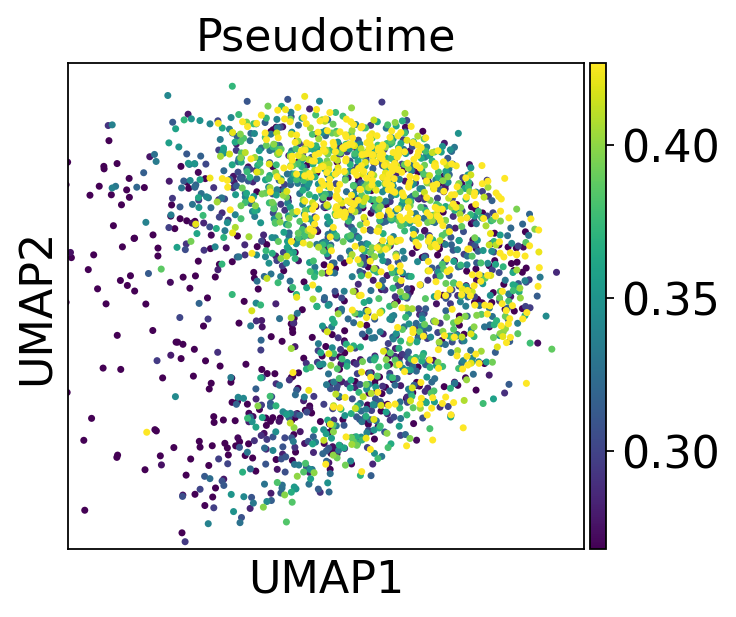

0.2677730619907379
0.4267788678407669


In [ ]:
adata_Liver=adata[(adata.obs['fasthigashi_leiden_anno_man']=='Liver') & (adata.obs['sample']!='E14.5F6')].copy()

os.chdir(out_dir)
fig = plt.figure(figsize=(5, 4))   
ax_1 = fig.add_subplot(111)
ax_1.set_xlim(5.7, 8.7)
ax_1.set_ylim(3, 7.5)
sc.pl.umap(adata_Liver,s=40, color=['Pseudotime'], ax=ax_1,
           vmin=np.quantile(adata_Liver.obs.Pseudotime, 0.15),
           vmax=np.quantile(adata_Liver.obs.Pseudotime, 0.85), 
           wspace=0.5, save='_Liver_pseudo.pdf')

print(np.quantile(adata_Liver.obs['Pseudotime'].values, 0.15))
print(np.quantile(adata_Liver.obs['Pseudotime'].values, 0.85))

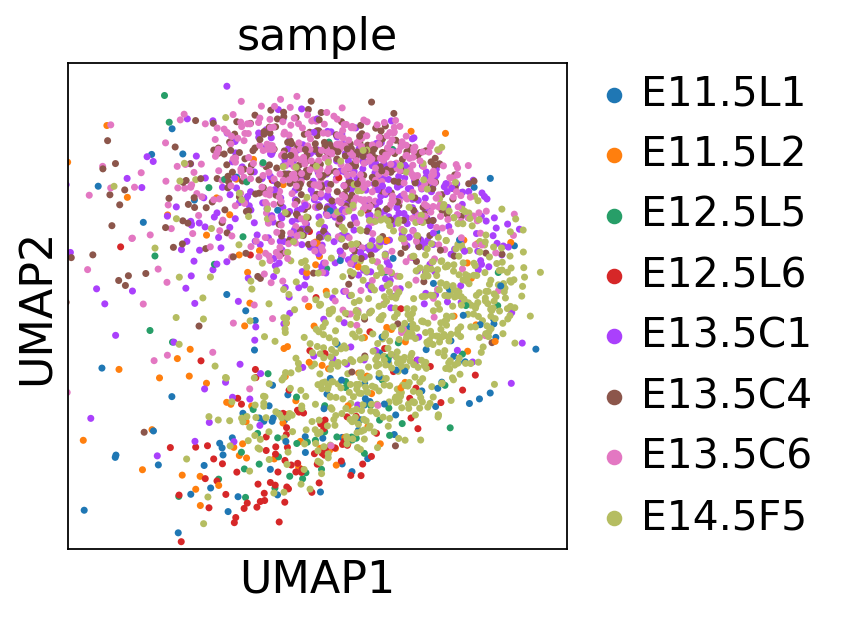

In [122]:
fig = plt.figure(figsize=(4, 4))  
ax_2 = fig.add_subplot(111)
ax_2.set_xlim(5.7, 8.7)
ax_2.set_ylim(3, 7.5)
sc.pl.umap(adata_Liver,s=40, color=['sample'], ax=ax_2,
           vmin=np.quantile(adata_Liver.obs.Pseudotime, 0.15),
           vmax=np.quantile(adata_Liver.obs.Pseudotime, 0.85),
           wspace=0.5, save='_Liver_sample.pdf')

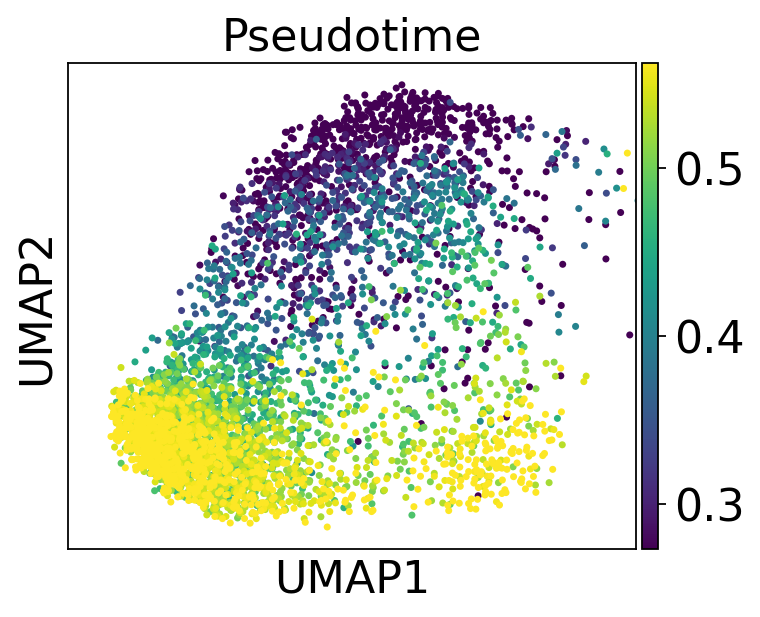

0.2731024146080017
0.562400472164154


In [112]:
adata_Brain=adata[(adata.obs['fasthigashi_leiden_anno_man']=='Brain') & (adata.obs['sample']!='E14.5F6')].copy()

os.chdir(out_dir)
fig = plt.figure(figsize=(5, 4))   
ax_1 = fig.add_subplot(111)
ax_1.set_xlim(-2.5, 6)
sc.pl.umap(adata_Brain,s=40, color=['Pseudotime'], ax=ax_1,
           vmin=np.quantile(adata_Brain.obs.Pseudotime, 0.15),
           vmax=np.quantile(adata_Brain.obs.Pseudotime, 0.85), 
           wspace=0.5, save='_Brain_pseudo.pdf')

print(np.quantile(adata_Brain.obs['Pseudotime'].values, 0.15))
print(np.quantile(adata_Brain.obs['Pseudotime'].values, 0.85))

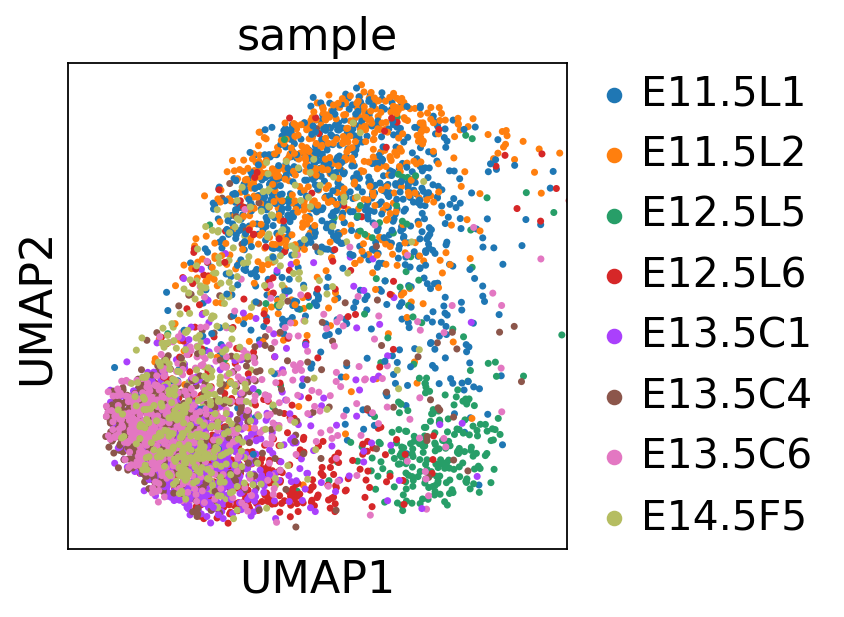

In [121]:
fig = plt.figure(figsize=(4, 4))  
ax_2 = fig.add_subplot(111)
ax_2.set_xlim(-2.5, 6)
sc.pl.umap(adata_Brain,s=40, color=['sample'], ax=ax_2,
           vmin=np.quantile(adata_Brain.obs.Pseudotime, 0.1),
           vmax=np.quantile(adata_Brain.obs.Pseudotime, 0.9),
           wspace=0.5, save='_Brain_sample.pdf')